# 02.Final Performance
In this notebook we load the data from the json-files for RF and XGB respectively. After combining the data we plot different boxplots and calculate the difference of the means between stratified vs. unstratifed of the evaluation metrics.

## Load json data for RF and XGB

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_rf = pd.DataFrame(data_all_flatten)
print('Shape of data', df_rf.shape)
print('Colum names of data', df_rf.columns)
print('Number of Colums', df_rf.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_rf.astype(str).duplicated().sum())


df_rf.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [2]:
#### Second: XGBoost
# set file path to json files (change model) -> get names of json files
json_path = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/xgb/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_xgb = pd.DataFrame(data_all_flatten)
print('Shape of data', df_xgb.shape)
print('Colum names of data', df_xgb.columns)
print('Number of Colums', df_xgb.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_xgb.astype(str).duplicated().sum())


df_xgb.head()

Shape of data (4800, 87)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_max_depth,unstratified_best_params_learning_rate,unstratified_best_params_gamma,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree
0,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.000000,0.687279,0.847472,2,2,0.311333,1.000000,0.982669
1,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,3.786479,0.982669,0.729761,6,2,0.222667,3.786479,0.982669
2,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,1.945888,0.548831,0.997877,2,2,0.222667,1.000000,0.585893
3,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.945888,0.982669,0.997877,4,2,0.134000,1.000000,0.517950
4,xgb,200,100000,8,0,identity,5,5,200,20,...,17,0.178333,1.394951,0.976185,0.697330,6,3,0.222667,1.394951,0.548831


In [3]:
data = pd.concat([df_rf, df_xgb], axis=0, ignore_index=True)
original_shape = data.shape[0]

In [4]:
# opitonal: exclude all rows if hyperparmeters are the same
exclude_hyp_dame = False
if exclude_hyp_dame:
    data = data[data['hyperparameters_same'] == False]
    data = data.reset_index(drop=True) #reset index of data
    print('Original shape: ', original_shape)
    print('Shape after removing hyperparameters that are the same: ', data.shape[0])
    print('Percetage', data.shape[0]/original_shape)
    data.head()
 

In [5]:
np.arange(2, 11)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# creat unique identifier for plots
model_vars = ['model_info_transformation', 'model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (9600, 100)


0    identity_200_0_5
1    identity_200_0_5
2    identity_200_0_5
3    identity_200_0_5
4    identity_200_0_5
Name: param_model, dtype: object

## Analysis Final Performance


### Function: Boxpot Estimation Error per unique experimental parameter combination

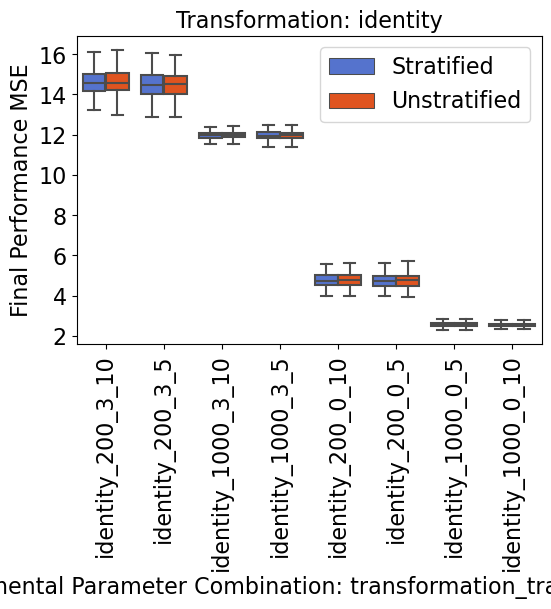

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
6                      identity_200_3_10         0.005001       0.016367   
0                     identity_1000_0_10         0.002310       0.001592   
3                      identity_1000_3_5         0.001733       0.007960   
5                       identity_200_0_5        -0.000650      -0.007778   
1                      identity_1000_0_5        -0.000841      -0.000440   
4                      identity_200_0_10        -0.002960      -0.000466   
2                     identity_1000_3_10        -0.005436      -0.003354   
7                       identity_200_3_5        -0.013190      -0.001727   

   Stratified  Unstratified  
6   14.642556     14.637556  
0    2.546733      2.544422  
3   11.966105     11.964371  
5    4.751784      4.752435  
1    2.558297      2.559138  
4    4.778563      4.781524  
2   11.963505     11.968941  
7   14.482579     14.495769  


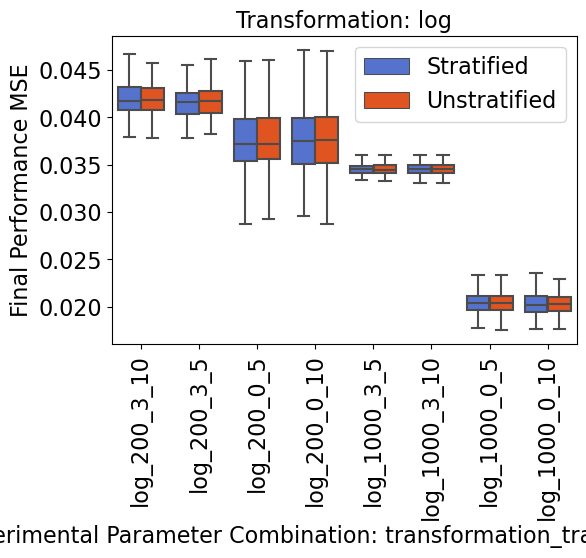

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
5                            log_200_0_5     4.331385e-05   9.401129e-05   
3                           log_1000_3_5     1.687900e-05  -2.211062e-05   
2                          log_1000_3_10     9.138850e-06  -3.464774e-06   
0                          log_1000_0_10     6.524450e-06  -5.990348e-07   
1                           log_1000_0_5    -4.484000e-07  -1.653909e-05   
6                           log_200_3_10    -5.464500e-06  -2.307109e-05   
4                           log_200_0_10    -5.417535e-05   6.002922e-05   
7                            log_200_3_5    -9.558680e-05  -4.215592e-05   

   Stratified  Unstratified  
5    0.037801      0.037758  
3    0.034536      0.034519  
2    0.034494      0.034485  
0    0.020360      0.020354  
1    0.020450      0.020451  
6    0.041991      0.041997  
4    0.037563      0.037617  
7    0.041630      0.041725  


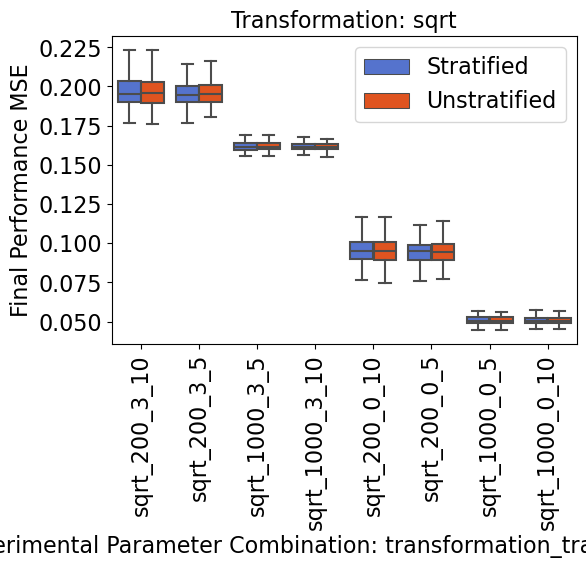

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
6                          sqrt_200_3_10         0.000493       0.000218   
4                          sqrt_200_0_10         0.000097      -0.000242   
1                          sqrt_1000_0_5         0.000025      -0.000003   
0                         sqrt_1000_0_10         0.000018      -0.000056   
5                           sqrt_200_0_5         0.000016       0.000046   
3                          sqrt_1000_3_5         0.000003      -0.000019   
2                         sqrt_1000_3_10        -0.000016      -0.000106   
7                           sqrt_200_3_5        -0.000207       0.000175   

   Stratified  Unstratified  
6    0.196877      0.196383  
4    0.095677      0.095581  
1    0.050825      0.050800  
0    0.050714      0.050696  
5    0.094892      0.094876  
3    0.161580      0.161577  
2    0.161543      0.161559  
7    0.195713      0.195920  


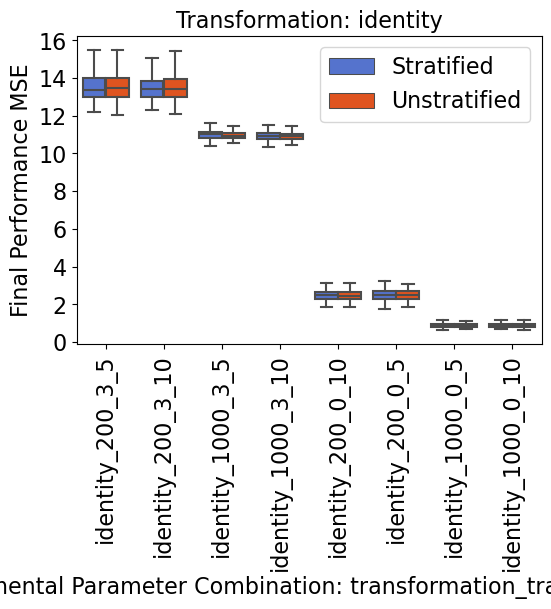

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                      identity_1000_3_5         0.038192       0.026224   
2                     identity_1000_3_10         0.019491       0.020853   
1                      identity_1000_0_5         0.010136       0.012020   
7                       identity_200_3_5         0.004468       0.045564   
5                       identity_200_0_5        -0.000895       0.014166   
4                      identity_200_0_10        -0.002881       0.004485   
0                     identity_1000_0_10        -0.007913       0.003494   
6                      identity_200_3_10        -0.051725      -0.050925   

   Stratified  Unstratified  
3   10.996778     10.958586  
2   10.927986     10.908494  
1    0.896512      0.886376  
7   13.549402     13.544934  
5    2.486034      2.486929  
4    2.489376      2.492257  
0    0.878039      0.885952  
6   13.464484     13.516209  


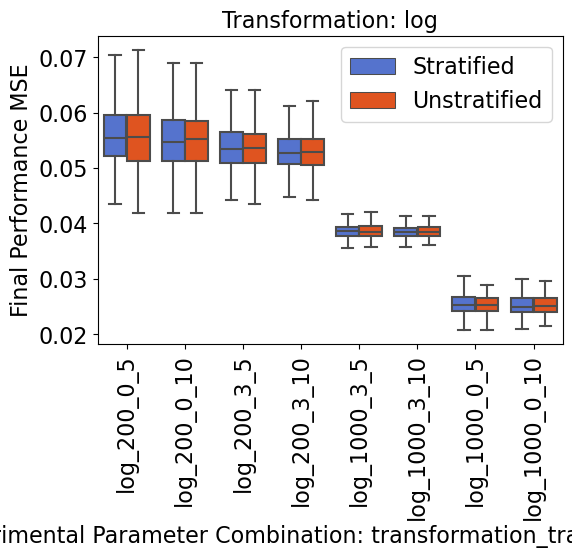

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
5                            log_200_0_5         0.000107      -0.000041   
1                           log_1000_0_5         0.000075       0.000283   
3                           log_1000_3_5         0.000049       0.000046   
2                          log_1000_3_10        -0.000018      -0.000031   
6                           log_200_3_10        -0.000037      -0.000244   
7                            log_200_3_5        -0.000079       0.000053   
0                          log_1000_0_10        -0.000089      -0.000020   
4                           log_200_0_10        -0.000134      -0.000062   

   Stratified  Unstratified  
5    0.055980      0.055873  
1    0.025468      0.025393  
3    0.038535      0.038485  
2    0.038424      0.038441  
6    0.053152      0.053190  
7    0.053614      0.053693  
0    0.025257      0.025346  
4    0.054934      0.055067  


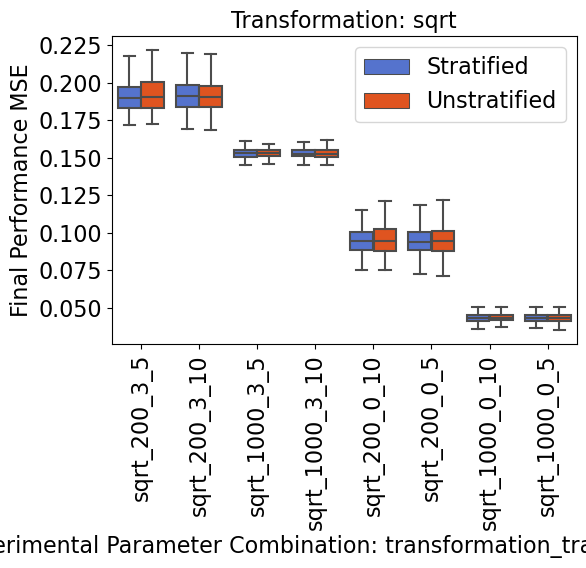

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                          sqrt_1000_3_5         0.000203       0.000542   
2                         sqrt_1000_3_10         0.000162       0.000050   
1                          sqrt_1000_0_5        -0.000056       0.000057   
5                           sqrt_200_0_5        -0.000072      -0.000660   
0                         sqrt_1000_0_10        -0.000281       0.000065   
6                          sqrt_200_3_10        -0.000476      -0.001004   
4                          sqrt_200_0_10        -0.000558      -0.000621   
7                           sqrt_200_3_5        -0.001368      -0.001748   

   Stratified  Unstratified  
3    0.153001      0.152798  
2    0.152895      0.152732  
1    0.043090      0.043146  
5    0.094802      0.094874  
0    0.043135      0.043416  
6    0.191491      0.191968  
4    0.094583      0.095141  
7    0.190753      0.192121  


In [7]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test mse': 'MSE_final_perf_stratified', 'unstratified_results_test mse': 'MSE_final_perf_unstratified'}, inplace=False)

for model in models: 
    for transformation in transformations: 
        # filter data for transformation and model
        data_filtered = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]
        # plot
        differences_table_all = plot_eval(value_vars= ['MSE_final_perf_stratified', 'MSE_final_perf_unstratified'] , 
                                           value_name = 'Final Performance MSE', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), 
                                           transformation = transformation, model = model)


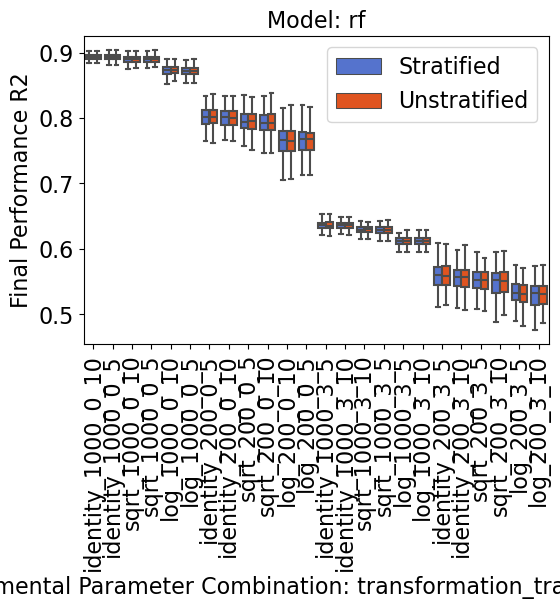

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
15                            log_200_3_5         0.001070      -0.000387   
23                           sqrt_200_3_5         0.000475       0.000401   
7                        identity_200_3_5         0.000402      -0.000053   
12                           log_200_0_10         0.000339       0.000376   
2                      identity_1000_3_10         0.000166      -0.000102   
4                       identity_200_0_10         0.000124      -0.000020   
14                           log_200_3_10         0.000061      -0.000259   
18                         sqrt_1000_3_10         0.000037      -0.000244   
1                       identity_1000_0_5         0.000035      -0.000018   
5                        identity_200_0_5         0.000027      -0.000326   
9                            log_1000_0_5         0.000003      -0.000103   
19                          sqrt_1000_3_5        -0.000006      -0.000060   

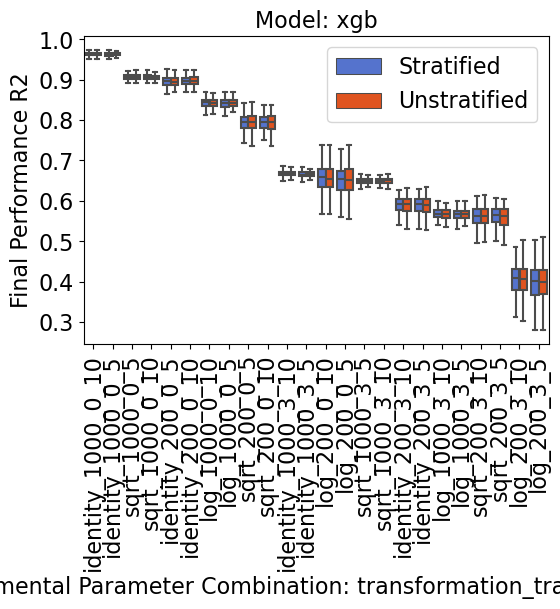

   Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
23                           sqrt_200_3_5         0.003137      -0.003931   
6                       identity_200_3_10         0.001575      -0.001551   
20                          sqrt_200_0_10         0.001212      -0.001351   
22                          sqrt_200_3_10         0.001093      -0.002305   
15                            log_200_3_5         0.000887       0.000599   
12                           log_200_0_10         0.000837      -0.000385   
16                         sqrt_1000_0_10         0.000610       0.000141   
8                           log_1000_0_10         0.000558      -0.000127   
14                           log_200_3_10         0.000437      -0.002978   
0                      identity_1000_0_10         0.000331       0.000146   
10                          log_1000_3_10         0.000194      -0.000273   
21                           sqrt_200_0_5         0.000156      -0.001435   

In [8]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test r2': 'R2_final_perf_stratified', 'unstratified_results_test r2': 'R2_final_perf_unstratified'})

for model in models: 
        # filter data for transformation and model
        data_filtered = data[data['model_info_model'] == model]
        # plot
        differences_table_all = plot_eval(value_vars= ['R2_final_perf_stratified', 'R2_final_perf_unstratified'] , 
                                           value_name = 'Final Performance R2', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), 
                                           transformation = 'None', model = model)


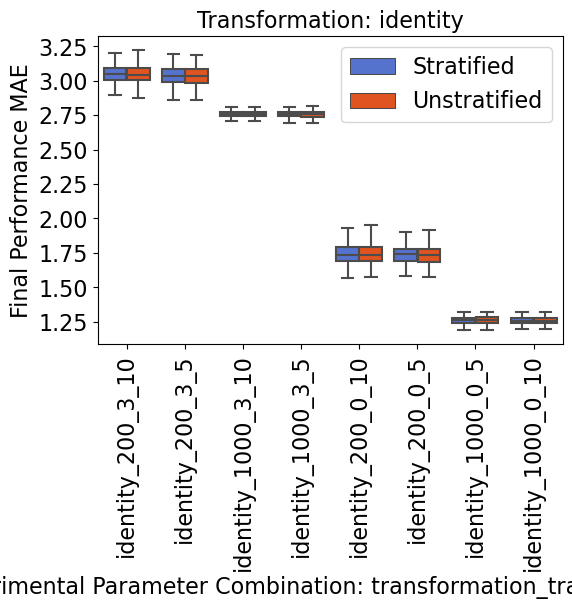

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
0                     identity_1000_0_10         0.000570       0.000234   
6                      identity_200_3_10         0.000472       0.001661   
3                      identity_1000_3_5         0.000160       0.000825   
5                       identity_200_0_5         0.000142      -0.001772   
1                      identity_1000_0_5        -0.000147      -0.000260   
4                      identity_200_0_10        -0.000655       0.000139   
2                     identity_1000_3_10        -0.000679      -0.000428   
7                       identity_200_3_5        -0.001403      -0.000119   

   Stratified  Unstratified  
0    1.259281      1.258711  
6    3.051215      3.050743  
3    2.757368      2.757208  
5    1.736697      1.736555  
1    1.263419      1.263565  
4    1.741401      1.742056  
2    2.757432      2.758110  
7    3.034408      3.035812  


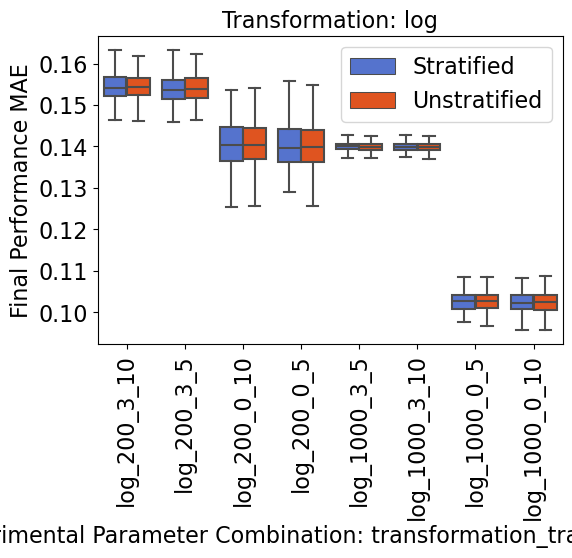

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                           log_1000_3_5         0.000052      -0.000009   
5                            log_200_0_5         0.000048       0.000195   
0                          log_1000_0_10         0.000044      -0.000001   
6                           log_200_3_10         0.000025       0.000055   
1                           log_1000_0_5         0.000021      -0.000022   
2                          log_1000_3_10         0.000016      -0.000005   
4                           log_200_0_10        -0.000112       0.000036   
7                            log_200_3_5        -0.000178       0.000016   

   Stratified  Unstratified  
3    0.139977      0.139925  
5    0.140562      0.140515  
0    0.102384      0.102341  
6    0.154720      0.154695  
1    0.102581      0.102560  
2    0.139842      0.139825  
4    0.140499      0.140612  
7    0.154050      0.154228  


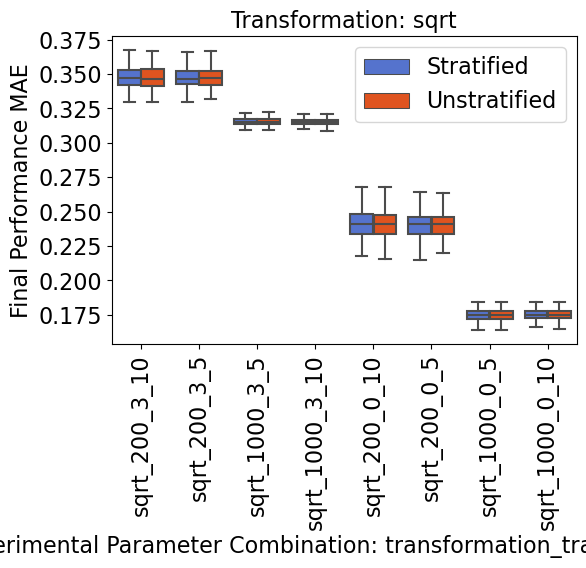

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
6                          sqrt_200_3_10         0.000393       0.000149   
4                          sqrt_200_0_10         0.000161      -0.000276   
0                         sqrt_1000_0_10         0.000053      -0.000101   
1                          sqrt_1000_0_5         0.000012      -0.000018   
5                           sqrt_200_0_5         0.000004       0.000067   
3                          sqrt_1000_3_5        -0.000009       0.000009   
2                         sqrt_1000_3_10        -0.000021      -0.000071   
7                           sqrt_200_3_5        -0.000192       0.000154   

   Stratified  Unstratified  
6    0.347939      0.347546  
4    0.241233      0.241072  
0    0.175043      0.174990  
1    0.175165      0.175153  
5    0.240613      0.240610  
3    0.315354      0.315363  
2    0.315310      0.315331  
7    0.347230      0.347421  


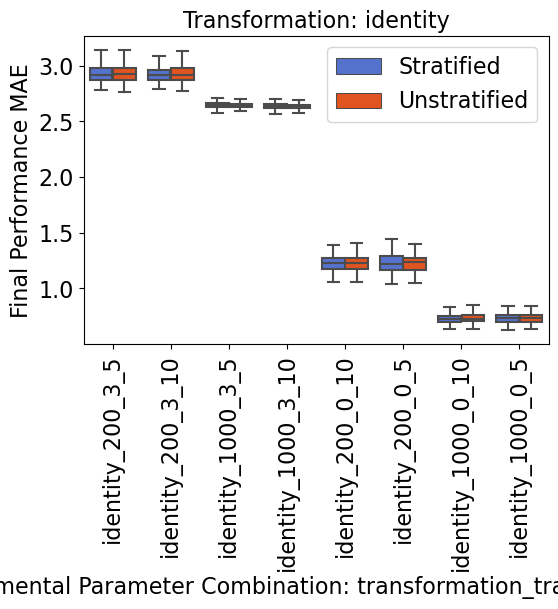

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                      identity_1000_3_5         0.004164       0.003001   
1                      identity_1000_0_5         0.003348       0.003790   
2                     identity_1000_3_10         0.002067       0.002808   
7                       identity_200_3_5         0.000488       0.004389   
5                       identity_200_0_5        -0.000666       0.004139   
4                      identity_200_0_10        -0.000738       0.002164   
0                     identity_1000_0_10        -0.003840       0.000823   
6                      identity_200_3_10        -0.005299      -0.004395   

   Stratified  Unstratified  
3    2.645429      2.641265  
1    0.736776      0.733428  
2    2.637032      2.634965  
7    2.931357      2.930869  
5    1.227642      1.228308  
4    1.229540      1.230278  
0    0.730832      0.734673  
6    2.924143      2.929442  


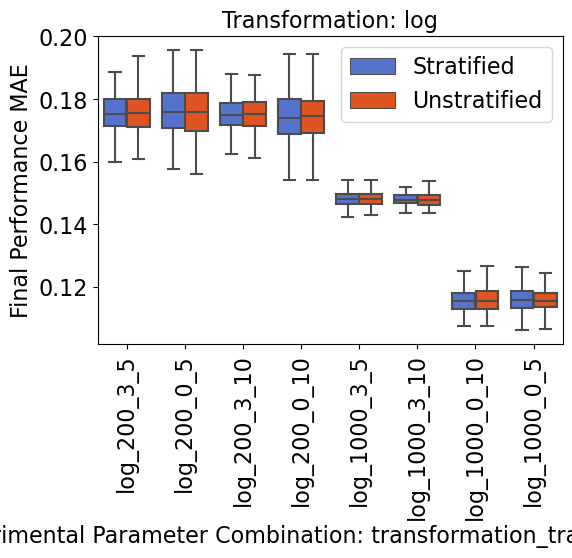

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
1                           log_1000_0_5         0.000285       0.000343   
5                            log_200_0_5         0.000124      -0.000387   
3                           log_1000_3_5         0.000111       0.000056   
6                           log_200_3_10        -0.000005      -0.000438   
2                          log_1000_3_10        -0.000046      -0.000147   
7                            log_200_3_5        -0.000065       0.000193   
0                          log_1000_0_10        -0.000141       0.000016   
4                           log_200_0_10        -0.000345      -0.000117   

   Stratified  Unstratified  
1    0.116069      0.115784  
5    0.176090      0.175967  
3    0.148068      0.147956  
6    0.175422      0.175427  
2    0.147715      0.147761  
7    0.175908      0.175974  
0    0.115696      0.115837  
4    0.174420      0.174765  


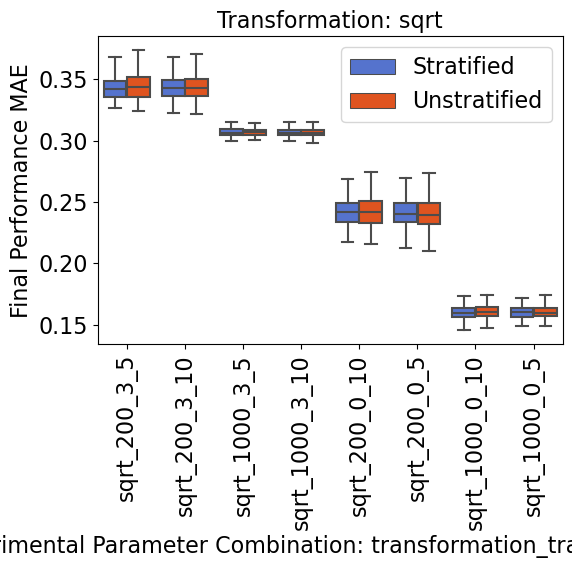

  Expermintel Hyperparameter Combinaiton  Difference Mean  Difference SD  \
3                          sqrt_1000_3_5         0.000203       0.000509   
2                         sqrt_1000_3_10         0.000163       0.000136   
5                           sqrt_200_0_5         0.000035      -0.000633   
1                          sqrt_1000_0_5        -0.000099       0.000188   
6                          sqrt_200_3_10        -0.000431      -0.000542   
0                         sqrt_1000_0_10        -0.000581       0.000057   
4                          sqrt_200_0_10        -0.000678      -0.000443   
7                           sqrt_200_3_5        -0.001201      -0.001532   

   Stratified  Unstratified  
3    0.306865      0.306663  
2    0.306676      0.306514  
5    0.241197      0.241163  
1    0.159955      0.160055  
6    0.343509      0.343940  
0    0.159955      0.160535  
4    0.241186      0.241863  
7    0.343005      0.344205  


In [9]:
transformations = data['model_info_transformation'].unique()
models = data['model_info_model'].unique()

# rename colum s that startified and unstratified is written at the end
data = data.rename(columns={'stratified_results_test mae': 'MAE_final_perf_stratified', 'unstratified_results_test mae': 'MAE_final_perf_unstratified'})

for model in models: 
    for transformation in transformations: 
        # filter data for transformation and model
        data_filtered = data[(data['model_info_transformation'] == transformation) & (data['model_info_model'] == model)]
        # plot
        differences_table_all = plot_eval(value_vars= ['MAE_final_perf_stratified', 'MAE_final_perf_unstratified'] , 
                                           value_name = 'Final Performance MAE', 
                                           data = data_filtered, model_vars_title = '_'.join(model_vars_title), 
                                           transformation = transformation, model = model)

### Convert table to latex

In [10]:
from tabulate import tabulate

# Assuming your data is stored in a DataFrame called df
latex_table = tabulate(differences_table_all, tablefmt="latex_raw", headers="keys", showindex=False)
print(latex_table)

\begin{tabular}{lrrrr}
\hline
 Expermintel Hyperparameter Combinaiton   &   Difference Mean &   Difference SD &   Stratified &   Unstratified \\
\hline
 sqrt_1000_0_10                           &      -0.000580531 &     5.67041e-05 &     0.159955 &       0.160535 \\
 sqrt_1000_0_5                            &      -9.92774e-05 &     0.000187599 &     0.159955 &       0.160055 \\
 sqrt_1000_3_10                           &       0.000162615 &     0.000135845 &     0.306676 &       0.306514 \\
 sqrt_1000_3_5                            &       0.000202535 &     0.000509431 &     0.306865 &       0.306663 \\
 sqrt_200_0_10                            &      -0.000677755 &    -0.000443265 &     0.241186 &       0.241863 \\
 sqrt_200_0_5                             &       3.45296e-05 &    -0.000632729 &     0.241197 &       0.241163 \\
 sqrt_200_3_10                            &      -0.000431331 &    -0.000541814 &     0.343509 &       0.34394  \\
 sqrt_200_3_5                             &

In [11]:
data['unstratified_best_params_min_samples_split'].value_counts(dropna=False)


unstratified_best_params_min_samples_split
NaN     4800
2.0     1643
3.0     1337
4.0      868
5.0      468
6.0      215
7.0      138
8.0       74
9.0       34
10.0      23
Name: count, dtype: int64

In [12]:
data['stratified_best_params_min_samples_split'].value_counts(dropna=False)


stratified_best_params_min_samples_split
NaN     4800
2.0     1633
3.0     1359
4.0      847
5.0      467
6.0      249
7.0      144
8.0       62
9.0       29
10.0      10
Name: count, dtype: int64